# Convolutional Neural Network

### Importing the libraries

In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [2]:
tf.__version__

'2.9.2'

## Part 1 - Data Preprocessing

### Download the dataset

In [ ]:
%%capture
!pip install --upgrade gdown
!gdown --id 1wNByyX2STBiJrgVqYyEtDRy8d9cTyyGg
!unzip /content/dataset.zip

### Preprocessing the Training set

In [4]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('/content/dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 8000 images belonging to 2 classes.


### Preprocessing the Test set

In [5]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 2000 images belonging to 2 classes.


## Part 2 - Building the CNN

### Initialising the CNN

In [6]:
cnn = tf.keras.models.Sequential()

### Step 1 - Convolution

In [7]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

### Step 2 - Pooling

In [8]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Adding a second convolutional layer

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Step 3 - Flattening

In [10]:
cnn.add(tf.keras.layers.Flatten())

### Step 4 - Fully Connected layer

In [11]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

### Step 5 - Output Layer

In [12]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [13]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)               8

## Part 3 - Training the CNN

### Compiling the CNN

In [14]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the CNN on the Training set and evaluating it on the Test set

In [15]:
history = cnn.fit(x = training_set, validation_data = test_set, epochs = 10)

Epoch 1/10
250/250 [==============================] - 39s 121ms/step - loss: 0.6639 - accuracy: 0.5972 - val_loss: 0.6108 - val_accuracy: 0.6545
Epoch 2/10
250/250 [==============================] - 30s 118ms/step - loss: 0.5970 - accuracy: 0.6759 - val_loss: 0.5651 - val_accuracy: 0.7125
Epoch 3/10
250/250 [==============================] - 29s 117ms/step - loss: 0.5679 - accuracy: 0.7105 - val_loss: 0.5527 - val_accuracy: 0.7280
Epoch 4/10
250/250 [==============================] - 29s 117ms/step - loss: 0.5306 - accuracy: 0.7368 - val_loss: 0.5121 - val_accuracy: 0.7525
Epoch 5/10
250/250 [==============================] - 30s 118ms/step - loss: 0.5001 - accuracy: 0.7561 - val_loss: 0.4842 - val_accuracy: 0.7685
Epoch 6/10
250/250 [==============================] - 29s 117ms/step - loss: 0.4764 - accuracy: 0.7686 - val_loss: 0.4888 - val_accuracy: 0.7710
Epoch 7/10
250/250 [==============================] - 30s 119ms/step - loss: 0.4540 - accuracy: 0.7872 - val_loss: 0.5078 - val_ac

## Part 4 - Making a single prediction

In [16]:
import numpy as np
from keras.preprocessing import image
test_image = tf.keras.utils.load_img('/content/dataset/single_prediction/cat_or_dog_1.jpg', target_size = (64, 64))
test_image_as_batch = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image_as_batch)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'
print(training_set.class_indices)

1/1 [==============================] - 0s 132ms/step
{'cats': 0, 'dogs': 1}


Model predicted: dog


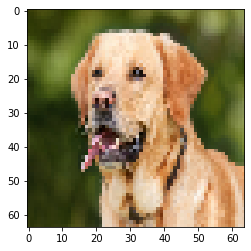

In [17]:
from matplotlib import pyplot as plt
plt.imshow(test_image)
print(f'Model predicted: {prediction}')

## Visualization of the Loss


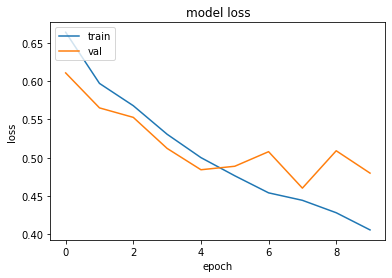

In [18]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

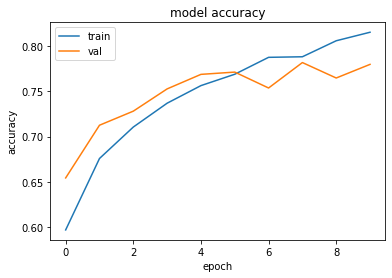

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [20]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [21]:
accuracy = round(history.history['accuracy'][-1], 2)
print(f'The model accuracy is: {accuracy}')

The model accuracy is: 0.81
